In [163]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from math import sqrt
import seaborn as sns

# Simulazione d'esame Laboratorio di Programmazione 2

## Esercizio 1

1. Crea un vettore NumPy con i seguenti **canoni mensili d'affitto** (in euro) per 4 appartamenti: **720, 980, 650, 1200**

2. Calcola la **spesa totale mensile** sostenuta dagli inquilini.

3. Il proprietario dell'appartamento da **1200 €** decide di **aumentare l’affitto del 12%**.
    - Modifica il vettore per applicare l’aumento.
    - L’importo aggiornato deve essere esattamente **1344,00 €**, controlla se appare **esattamente** nel tuo array.


4. L'inquilino dell'appartamento da **650 €** ottiene uno **sconto del 10%**.
    - Applica la modifica.

5. Gli altri due appartamenti (**720 € e 980 €**) subiscono un **aumento del 5%**.
    - Aggiorna il vettore di conseguenza.

7. Calcola la **nuova spesa totale mensile** dopo tutti i cambiamenti.

8. Infine: quanto ha influito **l’aumento dell’affitto più alto** sulla spesa complessiva?

    (Suggerimento: confronta la spesa totale **prima di qualsiasi modifica** e **dopo il solo aumento del canone a 1200 €**.)


In [213]:
#punto 1
affitto = np.array([720, 980, 650, 1200])
affitto

array([ 720,  980,  650, 1200])

In [214]:
#punto 2
spesaTotIniziale = affitto.sum()
print(f"Spesa totale = {spesaTotIniziale}")

Spesa totale = 3550


In [ ]:
#punto 3
affitto[3] += (affitto[3] * 0.12) 
spesaTotIntermedia = affitto.sum()

print(np.isclose(affitto[3], 1344.00))
print(affitto)

[ 720  980  650 1344]


In [50]:
#punto 4
affitto[2] -= (affitto[2] * 0.1)
affitto

array([ 720,  980,  585, 1344])

In [51]:
#punto 5
affitto[0] += (affitto[0]*0.05) 
affitto[1] += (affitto[1]*0.05)
affitto

array([ 756, 1029,  585, 1344])

In [52]:
#punto 6
spesaTotFinale = affitto.sum()
print(f"Spesa totale dopo i cambiamenti: {spesaTotFinale}")

Spesa totale dopo i cambiamenti: 3714


In [55]:
print(spesaTotIniziale, spesaTotIntermedia)
aumentoTot = spesaTotFinale - spesaTotIniziale
aumentoSoloPrimo = spesaTotIntermedia - spesaTotIniziale
print(f"L'aumento del primo costituisce il {(aumentoSoloPrimo/aumentoTot)*100:.2f}% dell'aumento totale")

3550 3694
L'aumento del primo costituisce il 87.80% dell'aumento totale


## Esercizio 2

Consideriamo un semplice processo di random walk (cammino aleatorio) in una dimensione:
a ogni passo temporale, un camminatore si sposta a destra (+1) o a sinistra (-1) con uguale probabilità. Supponiamo che il camminatore parta sempre da x=0.

1. Scrivi una funzione che simula il cammino per n passi ed N camminatori e restituisce due array. Il primo rappresenta la media della posizione ad ogni passo degli N camminatori ed il secondo la deviazione standard della posizione ad ogni passo degli N camminatori.

2. Fai prima il plot della media delle posizione degli N camminatori per 100 passi 

3. Fai il plot con anche la devizione standard.  La deviazione standard diminuisce all'aumentare del campione? Che andamento ha la deviazione standard rispeto l tempo/passi?

In [120]:
#punto 1
def cammino(n_passi, N_camminatori):
    #array con posizione di tutti gli N camminatori allo stesso turno
    passi = np.zeros(N_camminatori, dtype=int)
    media = np.zeros(n_passi, dtype=float)#questo lo creo grande come il numero di passi
    stddev = np.zeros(n_passi, dtype=float)
    for i in range(n_passi):
        for j in range(len(passi)):
            #i rappresenta il tempo, j serve per ciclare sull'array
            passi[j] += np.random.choice([-1, 1])
        #quando sono qua a ogni passo ho la posizione di tutti
        media[i] = np.mean(passi)
        stddev[i] = sqrt(np.var(passi))
    return media, stddev


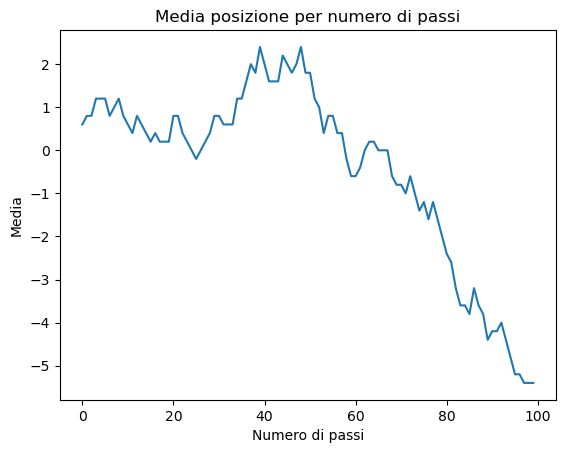

In [218]:
#punto 2

media, devstd = cammino(100, 10)
plt.plot(media)
plt.title("Media posizione per numero di passi")
plt.xlabel("Numero di passi")
plt.ylabel("Media")
plt.show()

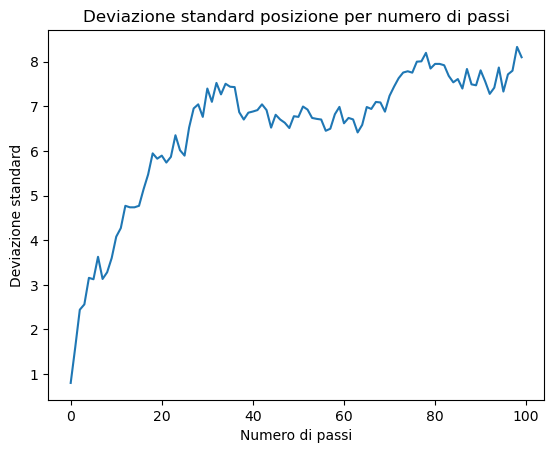

In [219]:
#punto 3
plt.plot(devstd)
plt.title("Deviazione standard posizione per numero di passi")
plt.xlabel("Numero di passi")
plt.ylabel("Deviazione standard")
plt.show()

In [ ]:
'''
Vedo che la deviazione standard non decresce con l'aumentare dei camminatori (anzi si stabilizza)
Mentre con l'aumentare dei passi il valore sale
'''

## Esercizio 3

Genera un array `a` di dimensioni **5 x 9** contenente numeri da una distribuzione gaussiana con media 0 e dev standard 1.  
Per ogni riga, seleziona il numero **più vicino a 0.1**.
Imposta il seed per la riproducibilità `np.random.seed(42)`

 *Suggerimento*: per ottenere `a[i, j]`, l'array `i` deve contenere gli **indici di riga** corrispondenti agli elementi in `j`.


In [162]:
np.random.seed(42)
a = np.random.normal(loc=0, scale=1, size=(5, 9))
print(a)
for riga in a:
    print(riga[np.argmin(abs(riga - 0.1))])


[[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
   1.57921282  0.76743473 -0.46947439]
 [ 0.54256004 -0.46341769 -0.46572975  0.24196227 -1.91328024 -1.72491783
  -0.56228753 -1.01283112  0.31424733]
 [-0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
  -0.54438272  0.11092259 -1.15099358]
 [ 0.37569802 -0.60063869 -0.29169375 -0.60170661  1.85227818 -0.01349722
  -1.05771093  0.82254491 -1.22084365]
 [ 0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
  -0.11564828 -0.3011037  -1.47852199]]
-0.13826430117118466
0.24196227156603412
0.11092258970986608
-0.013497224737933921
0.1713682811899705


## Esercizio 4

Utilizza il dataset `titanic`, disponibile all'url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

Esegui un’analisi esplorativa sui dati dei passeggeri, focalizzandoti su tariffe, età e componenti familiari.

1. **Visualizza i primi 10 passeggeri ordinati per tariffa pagata** (`Fare`), dal più alto al più basso.

2. **Calcola la media** di:
   - `Age` (età)
   - `Fare` (tariffa)
   - `SibSp` (numero di fratelli/coniugi a bordo)

3. **Crea una nuova colonna** chiamata `Family_index`, definita come:

   $$
   \texttt{family\_index} = \frac{\texttt{sibsp} + \texttt{parch}}{\texttt{fare}}
   $$

   *(Indicatore del “peso familiare” per unità di spesa – attenzione a eventuali divisioni per zero!)*

4. Trova il **passeggero con il valore massimo** di `Family_index`.

5. **Filtra solo i passeggeri** che hanno pagato **più di 100** di tariffa (`Fare > 100`).

6. **Crea un grafico a barre** con i 10 passeggeri che hanno pagato di più (`Fare`).

7. **Crea un grafico a linee** dell’età (`Age`), ordinando i passeggeri per tariffa (`Fare`) crescente.



💡 *Suggerimenti*:
- Ricordati di gestire eventuali valori mancanti in `Age` o `Fare` prima di fare operazioni.


In [192]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [193]:
df.dropna(subset=("Age", "Fare"), inplace=True)

In [194]:
#punto 1
df.sort_values(by="Fare", ascending=False).head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C


In [195]:
#punto 2
print(df["Age"].mean())
print(df["Fare"].mean())
print(df["SibSp"].mean())

29.69911764705882
34.694514005602244
0.5126050420168067


In [198]:
#punto 3
df["Family_index"] = (df["SibSp"] + df["Parch"])/df["Fare"]
df["Family_index"].fillna(0, inplace=True)


/tmp/ipykernel_4996/2837608332.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Family_index"].fillna(0, inplace=True)


In [202]:
#punto 4
df.sort_values(by="Family_index", ascending=False).head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_index
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.925,NaN,S,0.757098


In [205]:
#punto 5
df.query('Fare>100')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_index
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S,0.019011
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S,0.019011
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C,0.004040
195,196,1,1,"Lurette, Miss. Elise",female,58.00,0,0,PC 17569,146.5208,B80,C,0.000000
215,216,1,1,"Newell, Miss. Madeleine",female,31.00,1,0,35273,113.2750,D36,C,0.008828
258,259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.3292,NaN,C,0.000000
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.00,0,1,PC 17582,153.4625,C125,S,0.006516
269,270,1,1,"Bissette, Miss. Amelia",female,35.00,0,0,PC 17760,135.6333,C99,S,0.000000
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,0.019795
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.00,0,1,PC 17558,247.5208,B58 B60,C,0.004040


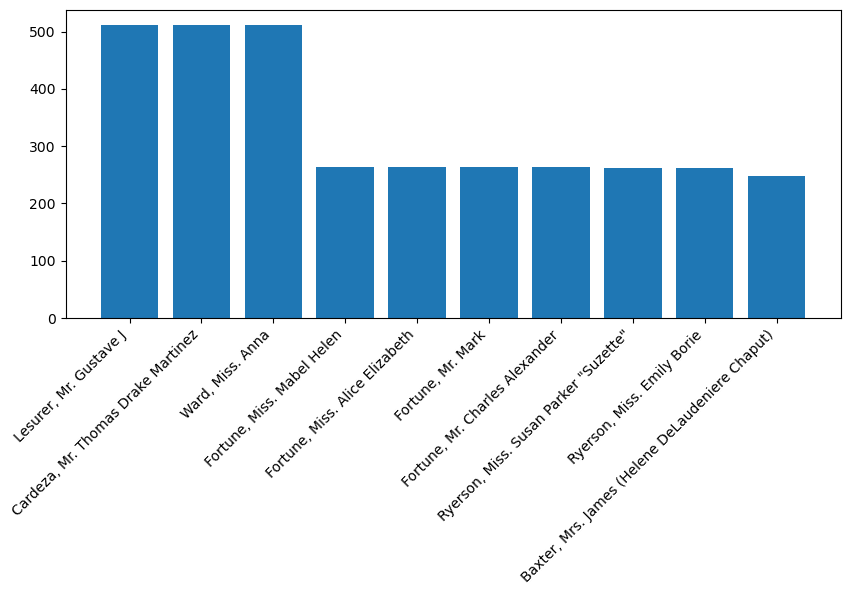

In [228]:
#punto 6
paganti = df.sort_values(by="Fare", ascending=False).head(10)
plt.figure(figsize=(10, 4))
plt.bar(paganti["Name"], paganti["Fare"])
plt.xticks(rotation=45, ha='right')
plt.show()

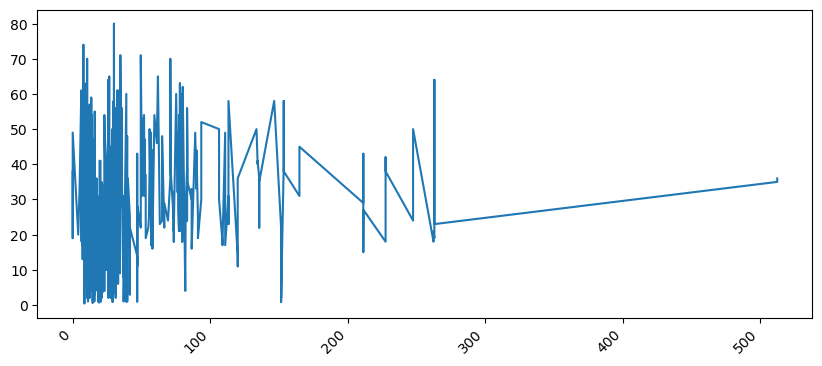

In [233]:
eta_fare_alti = df[["Fare", "Age"]].sort_values(by="Fare")
plt.figure(figsize=(10, 4))
plt.plot(eta_fare_alti["Fare"], eta_fare_alti["Age"])
plt.xticks(rotation=45, ha='right')
plt.show()

## Esercizio 5

Usa il dataset `penguins`, disponibile tramite `seaborn.load_dataset("penguins")`.


1. Quante righe e colonne ha il dataset?

2. Controlla quanti valori mancanti ci sono per colonna.

3. Riempi i valori mancanti nella colonna `sex` con il valore più frequente.

4. Rimuovi le righe in cui il valore `body_mass_g` è mancante.

5. Controlla se ci sono righe duplicate.

6. Calcola la **massa corporea media** (`body_mass_g`) per ogni specie (`species`).
  Se ci sono valori mancanti in `body_mass_g`, riempili con la media della specie.

7. Visualizza la **distribuzione della massa corporea** (`body_mass_g`) per specie.

8.  Visualizza la **distribuzione della massa corporea** per specie, **dividendo per sesso** (`sex`) e mostrandoli a confronto.


💡 Suggerimento: usa `seaborn.violinplot()`, `boxplot()` o `kdeplot()` con `hue='sex'`.


## Esercizio 6

Hai due array NumPy generati come segue:

`x = np.linspace(0, 10, 100)`  
`y = 3 * x + 2 + np.random.normal(0, 1, 100)`

Scrivi una funzione `fit_line(x, y)` che:

- usa `scipy.optimize.curve_fit` per eseguire un **fitting lineare** del tipo `y = a * x + b`;  
- restituisce una tupla contenente:
  - i **parametri ottimizzati** `a` e `b`;  
  - una **stringa** che descrive la retta trovata, ad esempio: `"y = 3.02 * x + 1.95"`.


Esempio di output atteso:   (3.02, 1.95, "y = 3.02 * x + 1.95")

Fai un esempio di utilizzo dove poi plotti i dati e la curva ottenuta.


In [207]:
from scipy.optimize import curve_fit

In [208]:
x = np.linspace(0, 10, 100)
y = 3 * x + 2 + np.random.normal(0, 1, 100)

def lineare(x, a, b):
    return(a*x + b)

def fit_line(x, y):
    popt, _ = curve_fit(lineare, x, y)
    return((popt[0], popt[1], f"y = {popt[0]}*x + {popt[1]}"))
print(fit_line(x, y))

(np.float64(2.9876240449211515), np.float64(2.162669634042467), 'y = 2.9876240449211515*x + 2.162669634042467')


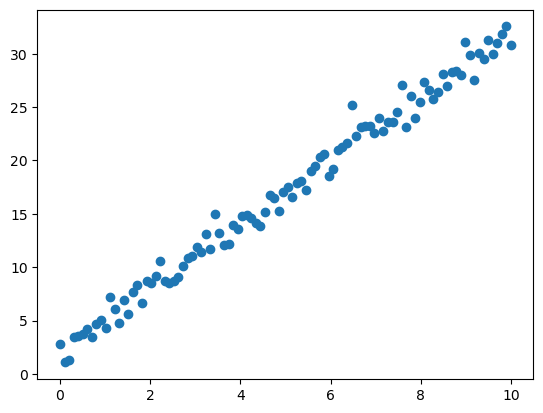

In [ ]:
plt.scatter(x, y)
plt.plot()